# Workshop in Text Analysis with SpaCy

SpaCy is one of the newest, fastest, and most accurate Python libraries for text analysis and natural language processing. This is a whirlwind tour of the package, which unfortunately omits many of SpaCy's best features, for the sake of time. But to learn more about this library, and about computational text analysis more generally, check out these resources: 

 - [An older revision of this workshop notebook](https://github.com/JonathanReeve/workshop-word-embeddings/tree/e0830c7515fee0cc5162654fd5a2a5bd5ea5a0ae)
 - [Notebooks from a course I taught at UC-Berkeley, called Introduction to Computational Literary Analysis](https://github.com/JonathanReeve/course-computational-literary-analysis/tree/master/Notes)
 - [The NLTK Book, _Natural Language Processing with Python_](http://www.nltk.org/book/) — not about SpaCy, but a good introduction to Python NLP. 
 - [SpaCy's collection of Jupyter notebooks, featuring an earlier version of this workshop](https://github.com/explosion/spacy-notebooks)
 - [A workshop notebook in word embeddings](https://github.com/JonathanReeve/workshop-word-embeddings/tree/e0830c7515fee0cc5162654fd5a2a5bd5ea5a0ae), which uses SpaCy. 
 - [SpaCy's own API documentation](https://spacy.io/api)

You can also get in touch with me, Jonathan Reeve, [via Gitter](https://gitter.im/JonathanReeve), or email (jon.reeve@gmail.com). Our lab, the [Literary Modeling and Visualization Lab](http://xpmethod.plaintext.in/projects/literary-modeling.html) of the [Group for Experimental Methods in Humanistic Research](http://xpmethod.plaintext.in/about.html) also has [a chatroom on Gitter](https://gitter.im/lit-mod-viz/Lobby) where anyone is welcome to ask questions, and [an open lab every Friday, from 3-5, in Studio@Butler](https://xpmethod.plaintext.in/lab-culture.html) during the semester. Come by and say hi!

## Installing the language model

To start processing text, we first have to download data about the language we want to process. The installation procedure can be a little tricky, and the best place to learn more about this is in [the SpaCy documentation](https://spacy.io/usage/models). For English, there are several language models available. Some have more features than others. Here, I'll be using `en_core_web_md`, since the smaller one doesn't have as many features, and the larger one will take a little too long to download for such a short workshop. But use whichever one you like. 

In a Jupyter or Google Colab notebook, you can often run a command like this, prefixed with the `!`, which indicates that it's a shell command, rather than a Python command. You can also run this in your terminal, omitting the `!`. 

In [0]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 95.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.1.0-cp36-none-any.whl size=97126237 sha256=8a7a09ae18ff8f834f20f8378ff70cd28e4e9b015ca03341195149ea79b2d50d
  Stored in directory: /tmp/pip-ephem-wheel-cache-37jfavfp/wheels/c1/2c/5f/fd7f3ec336bf97b0809c86264d2831c5dfb00fc2e239d1bb01
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
import spacy
import requests      # For downloading things
import pandas as pd  # For data sciencey stuff
import numpy as np   # For binning
from collections import Counter # For counting

In [0]:
import en_core_web_md
nlp = en_core_web_md.load()

In [0]:
# Or use the default model, which has fewer features:
# nlp = spacy.load('en')

In [0]:
# I shortened these links to make them easier to type during the workshop, 
# but they just point to files here: https://github.com/JonathanReeve/advanced-text-analysis-workshop-2017
grailRaw = requests.get('http://bit.ly/grail-txt').text
prideRaw = requests.get('http://bit.ly/pride-txt').text

In [0]:
# If I have those files in my local directory, I can just run: 
# prideRaw = open('pride.txt').read()

In [0]:
print(grailRaw[:200]) # Sanity check

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of t


In [0]:
print(prideRaw[:200])

﻿It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first


In [0]:
grail = nlp(grailRaw)

In [0]:
type(grail)

spacy.tokens.doc.Doc

In [0]:
pride = nlp(prideRaw)

In [0]:
type(pride)

spacy.tokens.doc.Doc

## What properties does this Doc object have? 

In [0]:
[prop for prop in dir(grail) if not prop.startswith('_')]

['cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_disk',
 'to_json',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

SpaCy processes everything all at once, which explains why the command above takes so long. It's doing named entity recognition, looking up word vectors, doing POS tagging, and performing other tasks. 

## How many words are there in a text? 

In [0]:
len(grail), len(pride)

(18523, 155364)

In [0]:
len(pride)

697752

In [0]:
grail[15] # The sixteenth word

Whoa

## How many sentences are there? 

In [0]:
type(grail.sents)

generator

## Side note: on generators

Generators are functions that behave as iterators, i.e., you can iterate over them with a `for` loop, like you would with a list. But you can't index them. So this works: 

```python
for sent in grailDoc.sents: 
  print(sent)
```

But not this: 

```python
print(grailDoc.sents[0]) # Doesn't work
```

However, you can force a generator into a list, using `list()`, and then index it. So to get the first sentence of _Pride and Prejudice_, one could write:

```python
list(pride.sents)[0]
```

But actually if we just want the first one, we can do this: 

```python
next(pride.sents)
```

## How many sentences are there in _Pride and Prejudice_? 

In [0]:
len(list(pride.sents))

10256

## What's the longest sentence in _Pride and Prejudice_?

In [0]:
prideSentLengths = [len(sent) for sent in prideDoc.sents]
[sent for sent in prideDoc.sents if len(sent) == max(prideSentLengths)]

[that Mr. Bingley, when questioned by Jane, had long ago
 asserted his blamelessness in the affair; that proud and repulsive as
 were his manners, she had never, in the whole course of their
 acquaintance--an acquaintance which had latterly brought them much
 together, and given her a sort of intimacy with his ways--seen anything
 that betrayed him to be unprincipled or unjust--anything that spoke him
 of irreligious or immoral habits; that among his own connections he was
 esteemed and valued--that even Wickham had allowed him merit as a
 brother, and that she had often heard him speak so affectionately of his
 sister as to prove him capable of _some_ amiable feeling; that had his
 actions been what Mr. Wickham represented them, so gross a violation of]

## What words appear more in exclamatory sentences? 

In [0]:
excl = [sent for sent in pride.sents if '!' in sent.text]
exclCounts = pd.Series(Counter([word.lemma_ for sent in excl for word in sent if not word.is_punct and not word.is_space]))
noExcl = [sent for sent in pride.sents if '!' not in sent.text]
noExclCounts = pd.Series(Counter([word.lemma_ for sent in noExcl for word in sent if not word.is_punct and not word.is_space]))

In [0]:
(exclCounts - noExclCounts).sort_values(ascending=False).head(10)

oh          79.0
Heaven       9.0
Lord         6.0
gracious     4.0
Good         3.0
ah           3.0
fun          2.0
strange      2.0
merry        1.0
ankle        1.0
dtype: float64

## Exploring properties of words (tokens)

In [0]:
universally = prideDoc[4]
type(universally)

spacy.tokens.token.Token

In [0]:
[prop for prop in dir(universally) if not prop.startswith('__')]

['_',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'tensor',
 

In [0]:
universally.i, universally.idx

(4, 15)

In [0]:
universally.prefix_

'u'

In [0]:
prideDoc[universally.sent_start:universally.i+1]

﻿It is a truth universally

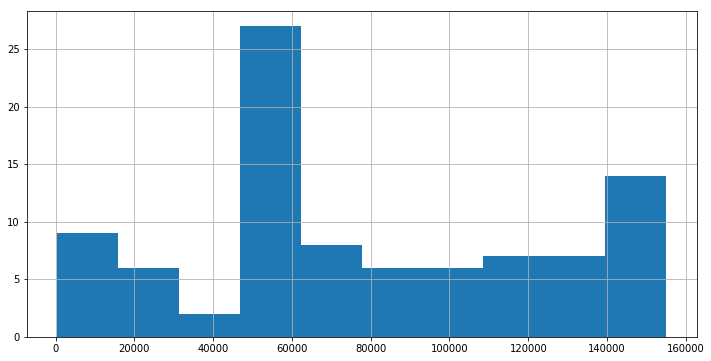

In [0]:
pd.Series([word.i for word in prideDoc if word.text == 'love']).hist(figsize=(12,6))

## Side note: on testing for word equality

SpaCy tests equality of _tokens_ but not _types_. This means that a word that is orthographically identical to another isn't necessarily identical according to Python's equality (`==`) operator. For example: 

In [0]:
universally == universally

True

In [0]:
type(universally)

spacy.tokens.token.Token

In [0]:
anotherUniversally = nlp("universally")[0]

In [0]:
type(anotherUniversally)

spacy.tokens.token.Token

In [0]:
universally == anotherUniversally

False

In [0]:
universally.ent_type

0

In [0]:
bennet = [w for w in pride if w.text == 'Bennet'][0]

In [0]:
bennet.ent_type

380

## Word probability and rank

SpaCy maintains data about word probabilities and word rank, according to what it's seen before in its training data. This can be useful for looking at certain slices of a text (its most frequent function words, or its lesser-frequent content words). 

**Warning:** This only seems to work with `en_core_web_md` and `en_core_web_lg`. 

In [0]:
set([(w.text, w.rank) for w in pride[:2000] if w.rank > 15000 and w.ent_type == 0])

{('Bennet', 17058),
 ('Bingley', 19468),
 ('Impossible', 16582),
 ('Kitty', 16496),
 ('acquaintance', 19142),
 ('acquainted', 19142),
 ('chaise', 17220),
 ('coughing', 17603),
 ('coughs', 17603),
 ('delight', 19198),
 ('exclamation', 18862),
 ('honour', 15400),
 ('impatiently', 17909),
 ('insufficient', 16315),
 ('morrow', 15967),
 ('neices', 18507),
 ('neighbourhood', 17105),
 ('nieces', 18877),
 ('persuade', 16836),
 ('quickness', 19526),
 ('resentfully', 17755),
 ('scolding', 16154),
 ('servants', 15938),
 ('solace', 16404),
 ('tumult', 16065),
 ('vexing', 18170)}

In [0]:
for w in next(prideDoc.sents):
  if w.prob < -10:
    print(w, w.prob)

﻿It -20.0
universally -12.210193634033203
acknowledged -12.411476135253906
possession -11.476877212524414

 -10.518562316894531
fortune -12.021092414855957


## Using word indices

We can use the `.i` property to find the distribution of these words in "narrative time," that is, an index of `1` would mean that it's the second word in the text. 

In [0]:
def getIndices(w):
  hist, bins = np.histogram(pd.Series([word.i for word in pride if word.text == w]), bins=50)
  return hist

In [0]:
wordList = ['love', 'hate', 'pride', 'prejudice']
characterList = ['Darcy', 'Elizabeth', 'Jane', 'Bingley']
wordIndices = [getIndices(w) for w in wordList]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddbcab6b00>,
      dtype=object)

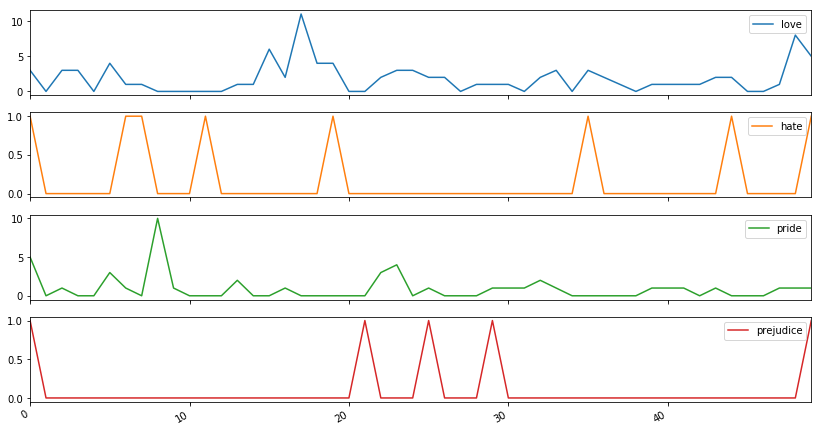

In [0]:
wordsDF = pd.DataFrame(wordIndices, index=wordList).T
wordsDF.plot(subplots=True, figsize=(14,8))

In [0]:
wordsDF.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Darcy,Elizabeth,Jane,Bingley
Darcy,1,0.048,-0.25,0.33
Elizabeth,0.048,1,0.085,0.082
Jane,-0.25,0.085,1,0.18
Bingley,0.33,0.082,0.18,1


In [0]:
def narrativeTime(w, text):
  return np.histogram(pd.Series([word.i for word in text 
           if word.lemma_ == w]), 50)[0]

def wordCorrelation(wordlist, text):
  df = pd.DataFrame([narrativeTime(w, text)
                 for w in wordlist], index=wordlist)
  return df.T.corr().style.background_gradient(cmap='coolwarm')

In [0]:
wordCorrelation(['Jane', 'Elizabeth', 'Darcy', 'Bingley'], 
                pride)

,Jane,Elizabeth,Darcy,Bingley
Jane,1,0.0848585,-0.254558,0.180005
Elizabeth,0.0848585,1,0.0479759,0.0818514
Darcy,-0.254558,0.0479759,1,0.330308
Bingley,0.180005,0.0818514,0.330308,1


## Exploring named entities

In [0]:
set([w.label_ for w in grailDoc.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [0]:
entSents = [ent.sent for ent in grailDoc.ents if ent.label_ == 'WORK_OF_ART']
entSents

[The Tale of Sir Robin.  ,
 The Castle Anthrax?,
 Oh, wicked, wicked Zoot.  ,
 HEAD KNIGHT: I cannot tell, suffice to say is one of the words the Knights of Ni cannot hear.,
 Consult the Book of Armaments!,
 Once the number three, being the third number, be reached, then lobbest thou thy Holy Hand Grenade of Antioch towards thy foe, who, being naughty in my sight, shall snuff it.',
 It's Aramaic!,
 It's the legendary Black Beast of Aaauugh!,
 [Black Beast of Aaauugh eats BROTHER MAYNARD] ,
 As the horrendous Black Beast lunged forward, escape for Arthur and his knights seemed hopeless, when suddenly, the animator suffered a fatal heart attack.]

In [0]:
spacy.displacy.render(entSents[4], style='ent', jupyter=True)

## Parts of speech

### Get the first fifty nouns in _Pride and Prejudice_

In [0]:
print([w for w in pride if w.pos_ == 'NOUN'][:50])

[truth, man, possession, fortune, want, wife, feelings, views, man, neighbourhood, truth, minds, families, property, daughters, lady, day, answer, wife, objection, invitation, dear, man, fortune, north, chaise, place, possession, servants, house, end, week, name, dear, man, fortune, year, thing, girls, wife, design, Nonsense, _, love, occasion, girls, party, dear, share, beauty]


## Dependency Parsing

In [0]:
spacy.displacy.render(next(prideDoc.sents), jupyter=True, options={'compact': True, 'collapse_punct': True, 'collapse_phrases': True})

## Navigating the dependency-parsed tree

We can use the `root` method to find the root verb of a sentence, and the `.children` and `.ancestors` properties to navigate up and down the tree. 

In [0]:
pride1 = next(pride.sents)
pride1.root

is

In [0]:
list(pride1.root.children)

[﻿It, truth, .]